In [1]:
#Librarries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings("ignore")


In [2]:

df = pd.read_csv(r"C:\Users\niraj\OneDrive\Desktop\DA projects\ML Logistic regression\weatherAUS.csv")
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


We have 23 columns and 145459 columns including null and duplicate dada #assumption

In [4]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
df.duplicated().sum()

0

No Duplicates found but there are lot of null values which needs to be filled.


In [6]:
df.dropna(inplace = True)
#for col in df.columns:
   # df[col].fillna(method = 'bfill')

In [7]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

Hence,No null values now.
If we look at the above table we see date ,location,Rain today and rain tomorrow is in object format and hence needs to be converted in its appropriate format. Format conversion will be done later down the line

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000


In [10]:
df["RainTomorrow"].describe()

count     56420
unique        2
top          No
freq      43993
Name: RainTomorrow, dtype: object

In [11]:
df["RainToday"].describe()

count     56420
unique        2
top          No
freq      43958
Name: RainToday, dtype: object

In [12]:
df["Rainfall"].describe()

count    56420.000000
mean         2.130397
std          7.014822
min          0.000000
25%          0.000000
50%          0.000000
75%          0.600000
max        206.200000
Name: Rainfall, dtype: float64

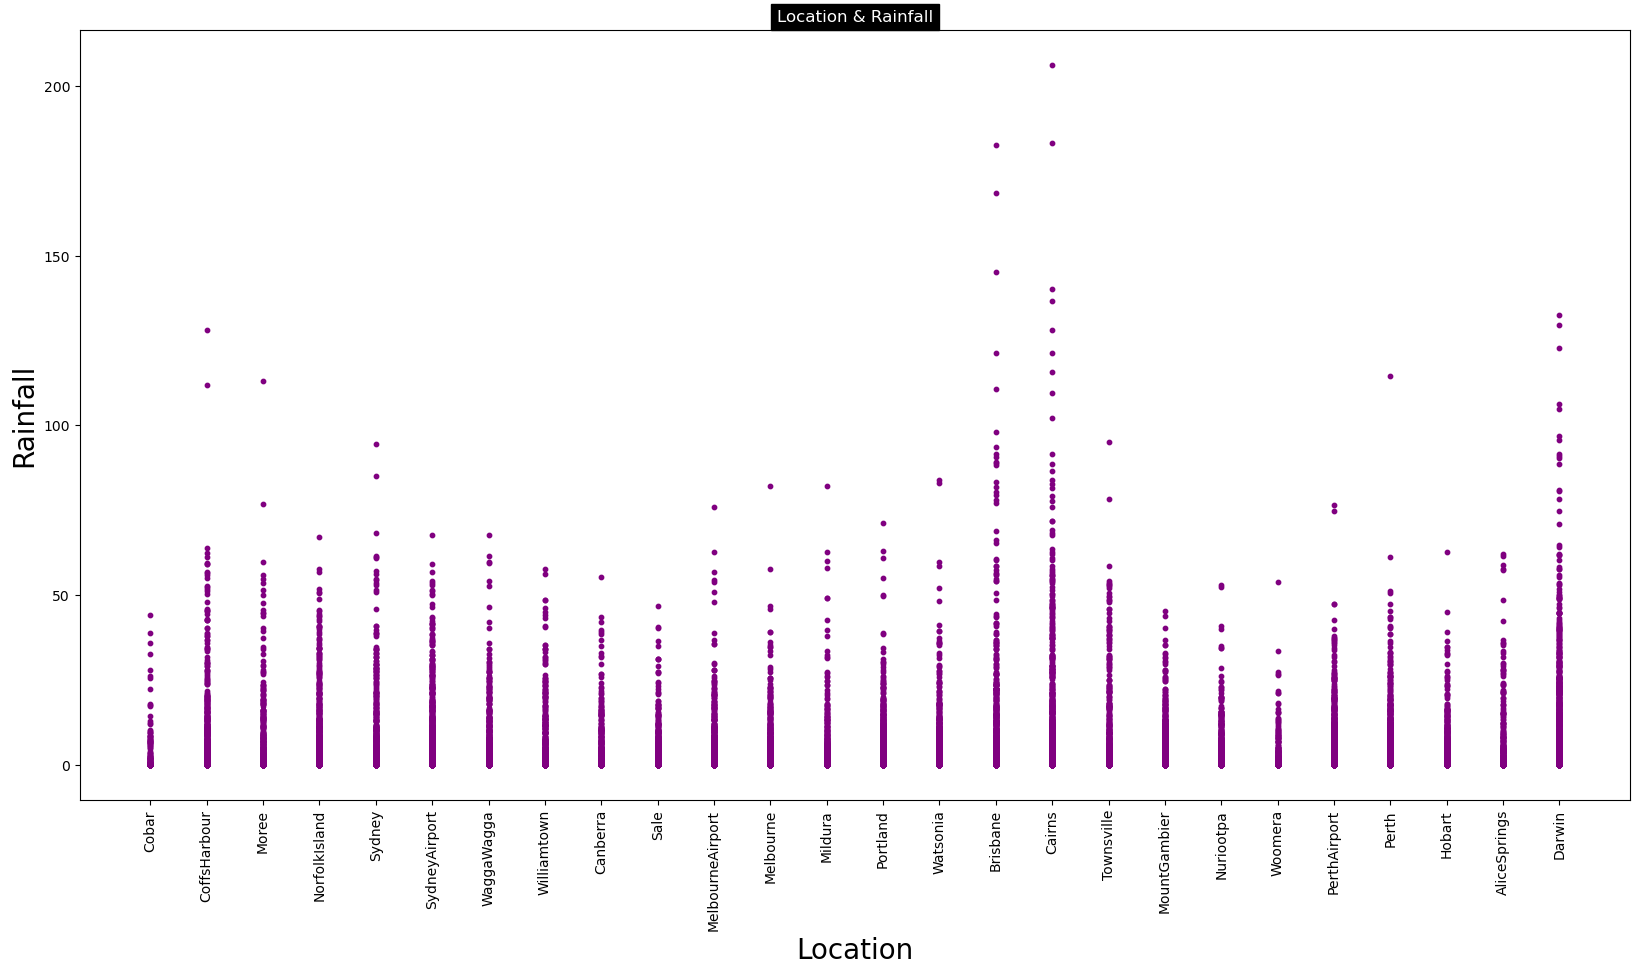

In [13]:
#let create visuals
#sns.pairplot(data = df, x_vars = "Location",y_vars = "Rainfall",height = 20)

plt.figure(figsize = (20,10), dpi = 100)
plt.scatter(data =df,x = "Location",y = "Rainfall",color = "Purple",marker = "o",s = 10)
plt.title('Location & Rainfall' , backgroundcolor='black' , color='white' , fontsize=12) #title
plt.xlabel('Location' , fontsize =20)
plt.ylabel('Rainfall' , fontsize =20)
plt.xticks(rotation=90)
plt.show()

In [14]:
#preprocessing


We see that location,WindGustDir,Raintoday,Raintomorrow are Categorical values
Hence,we needs to use label encoder to convert them into numerical values

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,4,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,4,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,4,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,4,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,4,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,6,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,6,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,6,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,6,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [17]:
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,4,17.9,35.2,0.0,12.0,12.3,11,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,4,18.4,28.9,0.0,14.8,13.0,8,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,4,19.4,37.6,0.0,10.8,10.6,5,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,4,21.9,38.4,0.0,11.4,12.2,14,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,4,24.2,41.0,0.0,11.2,8.4,14,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,6,19.3,33.4,0.0,6.0,11.0,1,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,6,21.2,32.6,0.0,7.6,8.6,0,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,6,20.7,32.8,0.0,5.6,11.0,0,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,6,19.5,31.8,0.0,6.2,10.6,2,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [18]:
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,4,17.9,35.2,0.0,12.0,12.3,11,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,2009-01-02,4,18.4,28.9,0.0,14.8,13.0,8,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,2009-01-04,4,19.4,37.6,0.0,10.8,10.6,5,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,2009-01-05,4,21.9,38.4,0.0,11.4,12.2,14,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,2009-01-06,4,24.2,41.0,0.0,11.2,8.4,14,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,6,19.3,33.4,0.0,6.0,11.0,1,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
142299,2017-06-21,6,21.2,32.6,0.0,7.6,8.6,0,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
142300,2017-06-22,6,20.7,32.8,0.0,5.6,11.0,0,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
142301,2017-06-23,6,19.5,31.8,0.0,6.2,10.6,2,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [19]:
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,2009-01-02,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,2009-01-04,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,2009-01-05,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,2009-01-06,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,6,19.3,33.4,0.0,6.0,11.0,1,35.0,9,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
142299,2017-06-21,6,21.2,32.6,0.0,7.6,8.6,0,37.0,9,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
142300,2017-06-22,6,20.7,32.8,0.0,5.6,11.0,0,33.0,0,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
142301,2017-06-23,6,19.5,31.8,0.0,6.2,10.6,2,26.0,9,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [20]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df.sort_values(by = 'Date',inplace = True)

In [23]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45587,2007-11-01,3,8.0,24.3,0.0,3.4,6.3,7,30.0,12,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,0,1
45588,2007-11-02,3,14.0,26.9,3.6,4.4,9.7,1,39.0,0,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,1,1
45589,2007-11-03,3,13.7,23.4,3.6,5.8,3.3,7,85.0,3,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,1,1
45590,2007-11-04,3,13.3,15.5,39.8,7.2,9.1,7,54.0,14,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,1,1
45591,2007-11-05,3,7.6,16.1,2.8,5.6,10.6,10,50.0,10,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,1,0


In [24]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
87199,2017-06-25,1,11.0,24.2,0.0,2.2,9.8,1,20.0,11,...,68.0,53.0,1020.5,1017.3,6.0,3.0,15.9,22.6,0,0
120637,2017-06-25,16,4.9,16.8,0.0,1.6,7.9,0,39.0,0,...,69.0,44.0,1028.5,1026.0,1.0,3.0,12.0,16.2,0,0
70392,2017-06-25,8,8.6,14.3,0.0,2.8,3.8,7,35.0,3,...,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,0,1
123830,2017-06-25,15,6.3,17.0,0.0,1.6,7.9,0,26.0,9,...,75.0,49.0,1028.6,1026.0,1.0,3.0,11.5,15.6,0,0
80997,2017-06-25,23,7.9,13.0,0.0,2.8,3.8,6,39.0,3,...,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,0,0


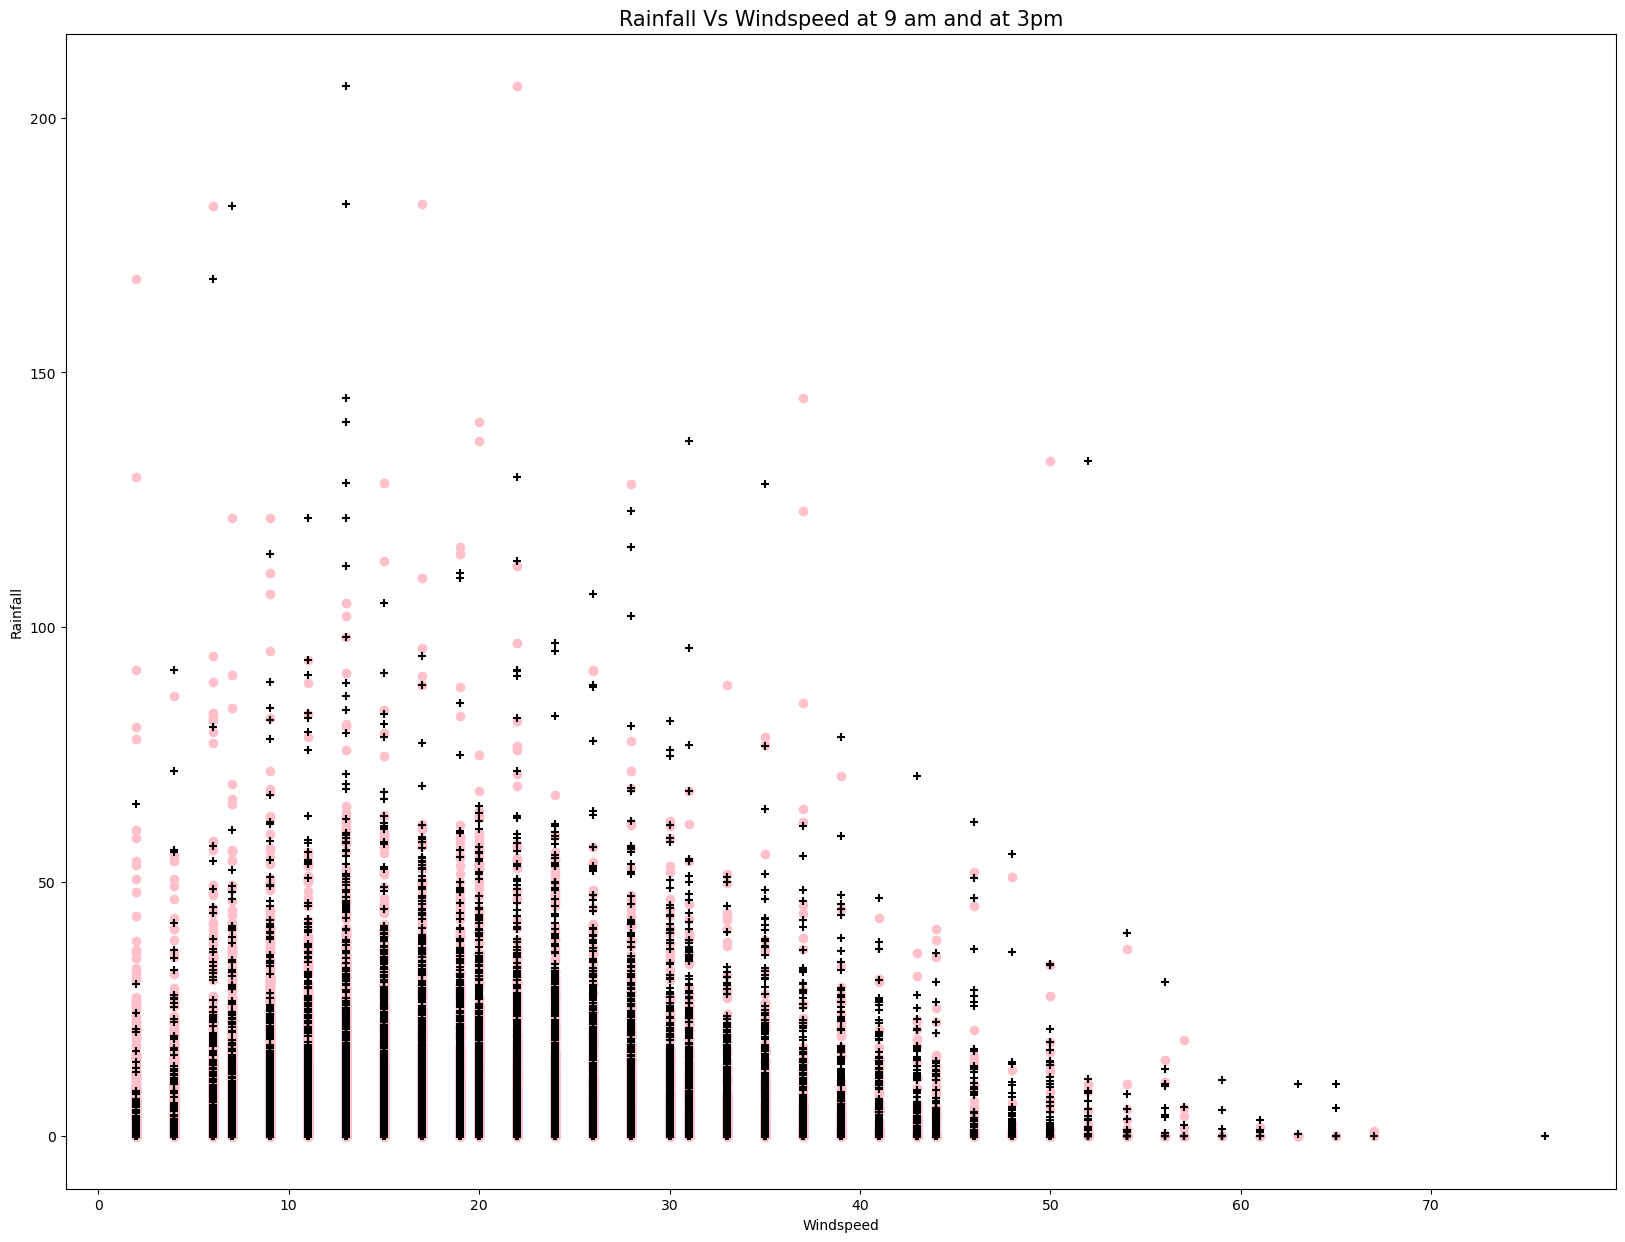

In [32]:
plt.figure(figsize = (20,15), dpi = 100)
plt.scatter(data = df, x = "WindSpeed9am" ,y = "Rainfall" ,color = "Pink",marker = "o")
plt.scatter(data = df, x = "WindSpeed3pm" ,y = "Rainfall" ,color = "Black",marker = "+")
plt.title("Rainfall Vs Windspeed at 9 am and at 3pm",fontsize = 15)
plt.xlabel("Windspeed",fontsize = 10)
plt.ylabel("Rainfall",fontsize = 10)
plt.show()

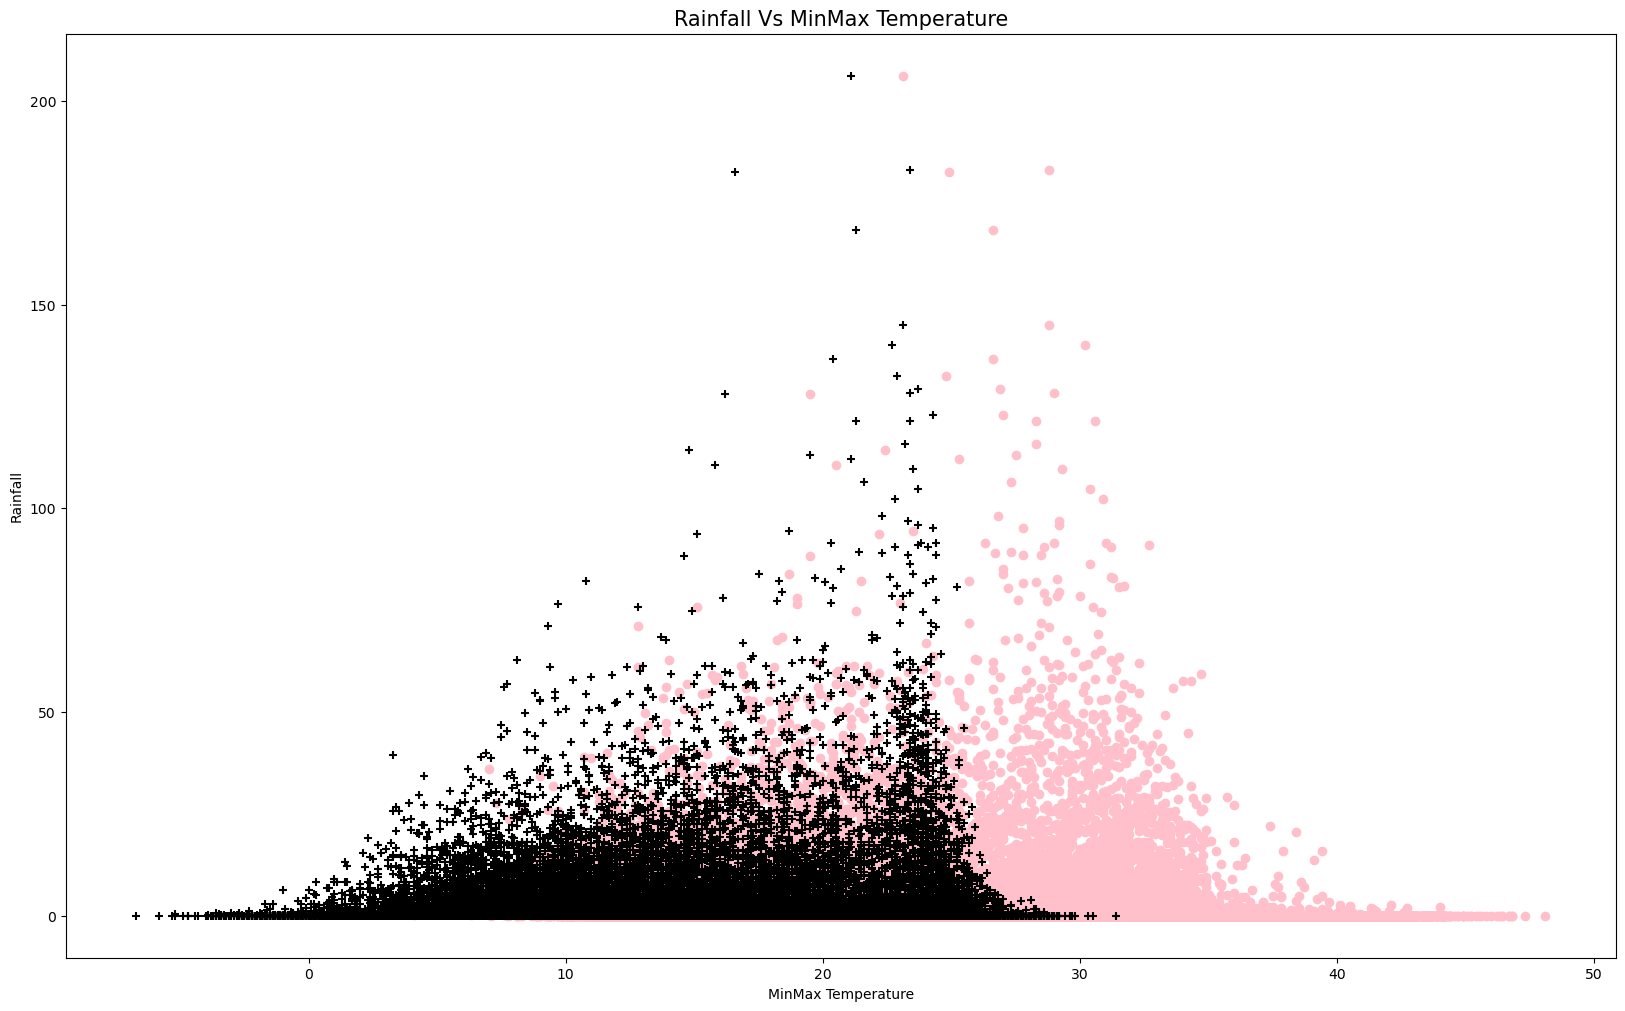

In [33]:
plt.figure(figsize = (20,12),dpi =100)
plt.scatter(data = df, x = "MaxTemp" ,y = "Rainfall" ,color = "Pink",marker = "o")
plt.scatter(data = df, x = "MinTemp" ,y = "Rainfall" ,color = "Black",marker = "+")
plt.title("Rainfall Vs MinMax Temperature",fontsize = 15)
plt.xlabel("MinMax Temperature",fontsize = 10)
plt.ylabel("Rainfall",fontsize = 10)
plt.show()

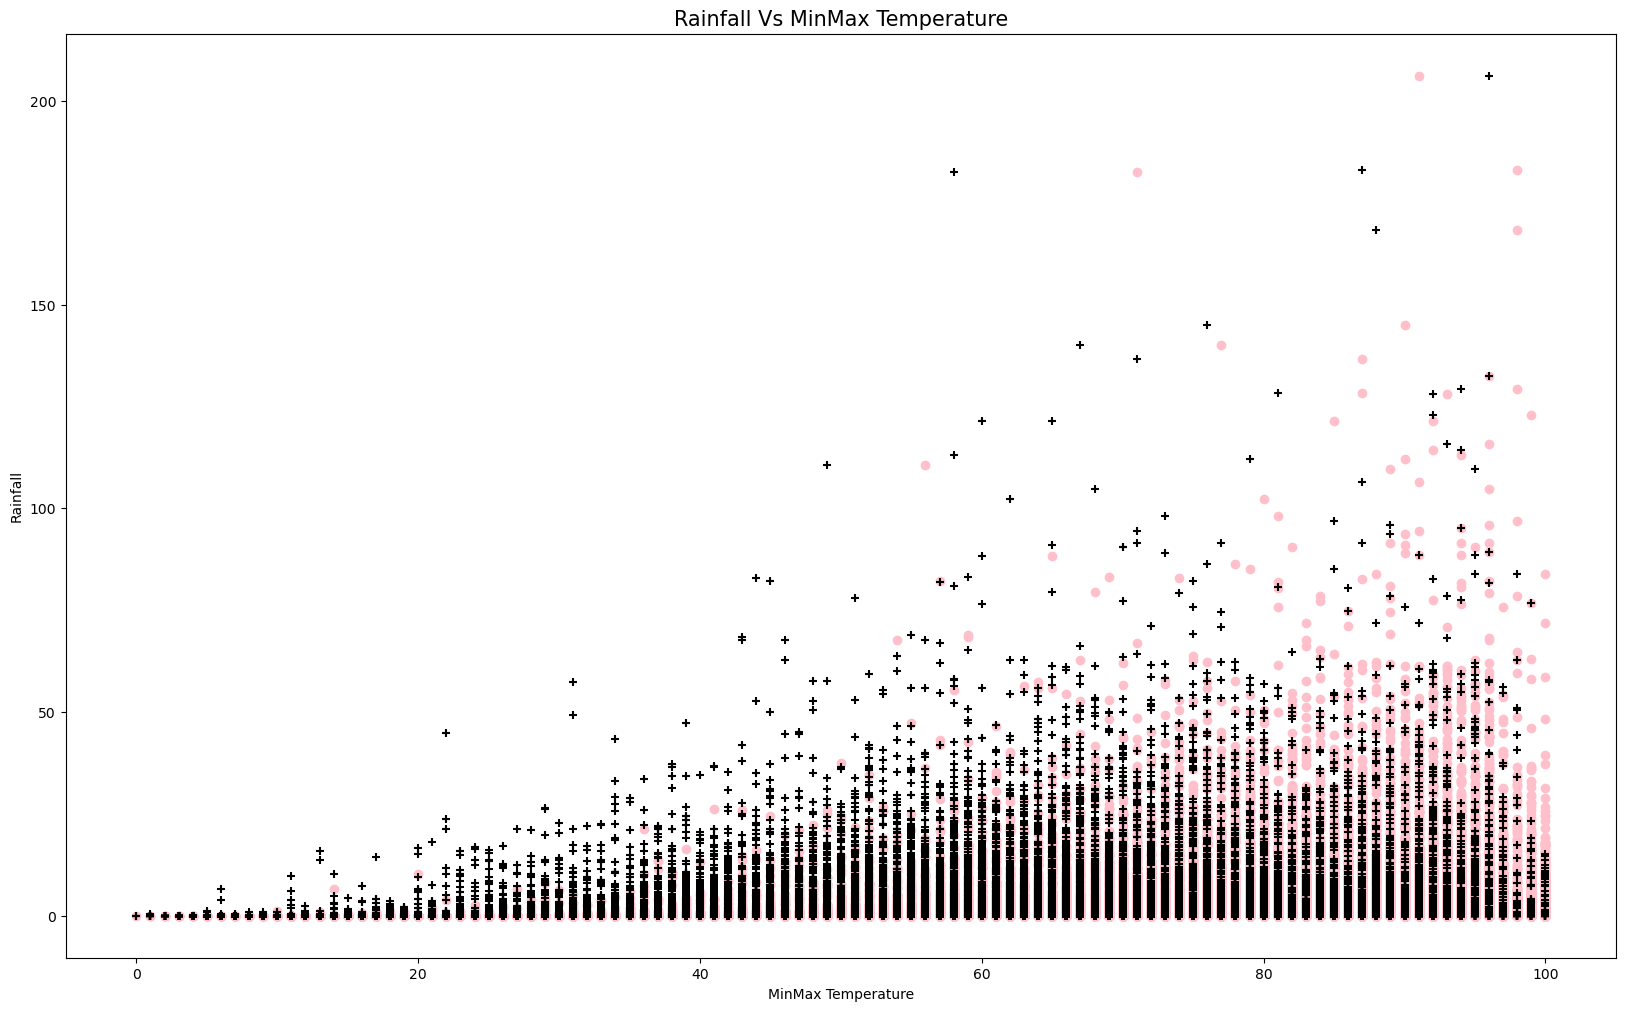

In [34]:
plt.figure(figsize = (20,12),dpi =100)
plt.scatter(data = df, x = "Humidity9am" ,y = "Rainfall" ,color = "Pink",marker = "o")
plt.scatter(data = df, x = "Humidity3pm" ,y = "Rainfall" ,color = "Black",marker = "+")
plt.title("Rainfall Vs MinMax Temperature",fontsize = 15)
plt.xlabel("MinMax Temperature",fontsize = 10)
plt.ylabel("Rainfall",fontsize = 10)
plt.show()

Temperature,Humidity and Windspeed plays an important role for forecasting hence plotted them against rainfall

In [36]:
df['Day'] = df["Date"].dt.day
df['Month'] = df["Date"].dt.month
df['Year'] = df["Date"].dt.year

In [37]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
45587,2007-11-01,3,8.0,24.3,0.0,3.4,6.3,7,30.0,12,...,1015.0,7.0,7.0,14.4,23.6,0,1,1,11,2007
45588,2007-11-02,3,14.0,26.9,3.6,4.4,9.7,1,39.0,0,...,1008.4,5.0,3.0,17.5,25.7,1,1,2,11,2007
45589,2007-11-03,3,13.7,23.4,3.6,5.8,3.3,7,85.0,3,...,1007.2,8.0,7.0,15.4,20.2,1,1,3,11,2007
45590,2007-11-04,3,13.3,15.5,39.8,7.2,9.1,7,54.0,14,...,1007.0,2.0,7.0,13.5,14.1,1,1,4,11,2007
45591,2007-11-05,3,7.6,16.1,2.8,5.6,10.6,10,50.0,10,...,1018.5,7.0,7.0,11.1,15.4,1,0,5,11,2007


In [38]:
newdf = pd.pivot_table(data = df,values = "RainTomorrow",index = "Month",columns = "Year")
newdf

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Month,,,,,,,,,,,
1,NaN,0.193548,0.147340,0.179259,0.262090,0.232053,0.170248,0.135678,0.274047,0.240458,0.202572
2,NaN,0.296296,0.179724,0.236629,0.256318,0.256318,NaN,0.192453,0.178571,0.157282,0.205776
3,NaN,0.071429,0.174338,0.211111,0.260797,0.230104,0.218333,0.215412,0.190991,0.220503,0.318182
4,NaN,0.148148,0.224784,0.226686,NaN,0.213404,0.189329,0.235081,0.246094,0.206759,0.180556
5,NaN,0.130435,0.176471,0.248555,0.230637,0.228279,0.273187,0.269928,0.213740,0.245509,0.194888
6,NaN,0.115385,0.271341,0.225076,0.234120,0.289703,0.249538,0.259740,0.228866,0.302083,0.159836
7,NaN,0.257485,0.219409,0.223859,0.237435,0.253859,0.251240,0.252747,0.267552,0.238854,NaN
8,NaN,0.132184,0.246715,0.277860,0.239389,0.214890,0.248739,0.200000,0.213645,0.272727,NaN
9,NaN,0.159763,0.234074,0.247407,0.196491,0.173045,0.222798,0.162706,0.175542,0.355556,NaN


In [48]:
#logistic regression model
from sklearn.model_selection import train_test_split 


In [49]:
y = df["RainTomorrow"]
X = df.drop(["RainTomorrow","Date"],axis = 1)
#Dropping rain tomorrow as it is our output variable and date as it is not numerical var

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 3)

In [51]:
from sklearn.preprocessing import MinMaxScaler
mme = MinMaxScaler()
X_train = mme.fit_transform(X_train)
X_test = mme.transform(X_test)

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [53]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_prediction = logreg.predict(X_test)

In [56]:
print(y_prediction[0:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1]


In [58]:
print(list(y_test[0:100]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]


From above comparision it looks like model is well trained but let us further check it

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Model accuracy score is:",accuracy_score(y_test,y_prediction))

Model accuracy score is: 0.8536689117334278


In [63]:
print("Train set score is:",logreg.score(X_train,y_train))
print("Test set score is:",logreg.score(X_test,y_test))

Train set score is: 0.8536216471700343
Test set score is: 0.8536689117334278


In [66]:
print("Precision:",precision_score(y_test,y_prediction))
print("Recall:",recall_score(y_test,y_prediction))
print("f1_score:",f1_score(y_test,y_prediction))

Precision: 0.7380448582310623
Recall: 0.5468798996550643
f1_score: 0.6282420749279539


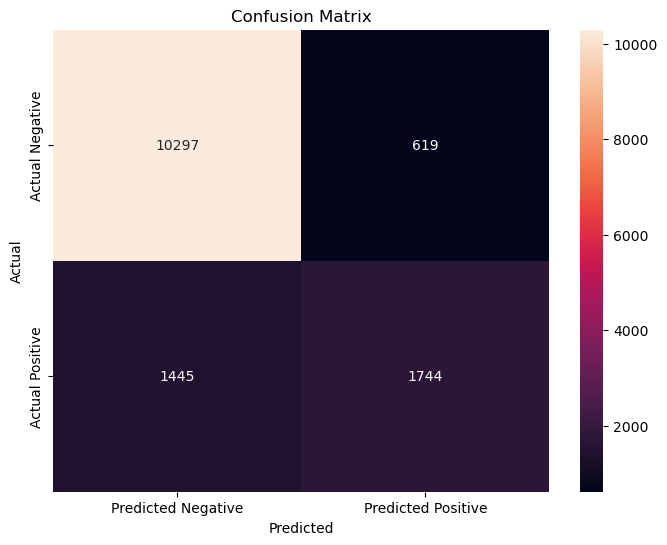

In [73]:
cm = confusion_matrix(y_test,y_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt = 'd',
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
With the help of Logistic regression we have achieved around 85% accuracy which means dataset is a good fit for the model and will prredict good outputs if deployed in future.Although Precision,recall and f1 scores are moderatly fair we say this model can predict good results